In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [2]:
pd.set_option('display.max_rows', 100) # выведем больше строк
pd.set_option('display.max_columns', 100) # выведем больше колонок

Part1

In [3]:
df = pd.read_csv('voiceDataSet.csv')

In [4]:
df.sample(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1822,0.184893,0.032948,0.187226,0.174930,0.197285,0.022355,3.025039,12.677074,0.816435,0.247042,0.190579,0.184893,0.172206,0.061776,0.213333,0.189453,0.164062,0.218750,0.054688,0.168831,female
2532,0.194188,0.035109,0.196923,0.176154,0.209615,0.033462,2.976112,13.299264,0.850313,0.263144,0.204231,0.194188,0.179228,0.047525,0.279070,1.613208,0.023438,8.531250,8.507812,0.056502,female
173,0.167105,0.074807,0.190606,0.107311,0.222246,0.114935,3.101154,27.286498,0.949590,0.652265,0.050129,0.167105,0.087281,0.018497,0.231884,2.100312,0.007812,5.382812,5.375000,0.385313,male
1604,0.110727,0.087557,0.088363,0.029822,0.194951,0.165128,1.722062,6.765329,0.962681,0.747374,0.008836,0.110727,0.189172,0.016000,0.262295,0.680707,0.007812,4.914062,4.906250,0.113133,female
2428,0.227390,0.037934,0.236298,0.205299,0.254083,0.048784,1.427472,4.089907,0.853294,0.201799,0.254083,0.227390,0.170895,0.047291,0.279070,1.000558,0.023438,7.148438,7.125000,0.096576,female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [6]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [7]:
df.label.value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [8]:
df.label = df.label.apply(lambda x: 1.0 if x=='male' else 0.0)

In [9]:
df.label.value_counts()

0.0    1584
1.0    1584
Name: label, dtype: int64

In [10]:
X = df.drop(['label'], axis = 1)
y = df['label']

In [11]:
X

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002


In [12]:
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3163    0.0
3164    0.0
3165    0.0
3166    0.0
3167    0.0
Name: label, Length: 3168, dtype: float64

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_norm = scaler.fit_transform(X_train)

In [17]:
X_train_norm

array([[ 0.59302874,  0.57407237,  0.76449091, ...,  1.28775703,
         1.29601024, -0.60076953],
       [ 1.02864696, -0.8623978 ,  0.6707645 , ...,  0.60529793,
         0.61351461, -0.0586141 ],
       [-1.5697296 ,  0.44212441, -2.10967973, ..., -0.4752623 ,
        -0.46272849, -0.67092623],
       ...,
       [ 0.70268611,  0.3585351 ,  0.98759758, ...,  0.65779479,
         0.66601428, -0.67171574],
       [ 0.01876944,  0.0655535 ,  0.16117858, ..., -0.20184118,
        -0.19366771, -0.92963127],
       [-0.44976218,  0.55134575, -0.39563191, ...,  0.26406839,
         0.2722668 , -0.4235738 ]])

In [18]:
model = LogisticRegression(random_state=42, max_iter=10000)
#model.fit(X_train, y_train)
model.fit(X_train_norm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
X_val_norm = scaler.fit_transform(X_val)

In [20]:
#y_predicted = model.predict(X_val)
y_predicted = model.predict(X_val_norm)

In [21]:
print(accuracy_score(y_val,y_predicted))
print(precision_score(y_val,y_predicted))
print(recall_score(y_val,y_predicted))
print(f1_score(y_val,y_predicted))

0.9737118822292324
0.9778225806451613
0.9719438877755511
0.9748743718592965


Part2

In [22]:
dfg = pd.read_csv('glass.csv')

In [23]:
dfg.sample(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
97,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
133,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2


In [24]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [25]:
dfg.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [26]:
dfg.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [27]:
X = dfg.drop(['Type'], axis=1)
y = dfg['Type']

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

In [29]:
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5)
cross_val_score(model, X, y, cv=kf, scoring="accuracy")

array([0.44186047, 0.65116279, 0.3255814 , 0.34883721, 0.07142857])

In [30]:
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=10)
cross_val_score(model, X, y, cv=kf, scoring="accuracy").mean()

0.5257575757575758

Part3

In [31]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [32]:
dfh = pd.read_csv('heart_fin.csv', sep=';')

In [33]:
dfh.sample(5)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
126,47,1,0,112,204,1,143,0,0.1,1
282,59,1,2,126,218,1,134,0,2.2,0
138,57,1,0,110,201,1,126,1,1.5,1
190,51,0,0,130,305,1,142,1,1.2,0
134,41,0,1,126,306,1,163,0,0.0,1


In [34]:
dfh.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'target'],
      dtype='object')

In [35]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   target    303 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.8 KB


In [36]:
def analyse_numeric(datafr, column):
    '''Визуализирует распределение числовой переменной.
       Принимает параметрами DataFrame и строковое название столбца
       Печатает различные статистические показатели и строит гистограмму.'''
    count = datafr[column].count()
    mean = datafr[column].mean()
    std = datafr[column].std()
    median = datafr[column].median()
    perc25 = datafr[column].quantile(0.25)
    perc75 = datafr[column].quantile(0.75)
    IQR = perc75 - perc25
    range_min = datafr[column].min()
    range_max = datafr[column].max()
    margin = (range_max - range_min)/10
    range_start = range_min - margin
    range_stop = range_max + margin
    range_ = (range_start, range_stop)
    outliers = datafr[column].loc[(datafr[column] < perc25 - 1.5*IQR) | (datafr[column] > perc75 + 1.5*IQR)]

    print('Количество: {}, Среднее: {:.3f}, Стандартное отклонение: {:.3f}.'.format(count, mean, std))
    print('Минимум: {}, 25-й перцентиль: {}, Медиана: {}, 75-й перцентиль: {}, Максимум: {}, IQR: {}.'
          .format(range_min, perc25, median, perc75, range_max, IQR))
    print('Количество пропусков в столбце: ', pd.isnull(datafr[column]).sum())
    print('Границы выбросов: [{f}, {l}].'.format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR)
          , 'Количество выбросов: ', len(outliers))

    datafr[column].loc[datafr[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)] \
                  .hist(bins = 30, range = range_, label = 'В границах выбросов')
    outliers.hist(bins = 30, range = range_, label = 'Выбросы')
    
    plt.legend()

Количество: 303, Среднее: 54.366, Стандартное отклонение: 9.082.
Минимум: 29, 25-й перцентиль: 47.5, Медиана: 55.0, 75-й перцентиль: 61.0, Максимум: 77, IQR: 13.5.
Количество пропусков в столбце:  0
Границы выбросов: [27.25, 81.25]. Количество выбросов:  0


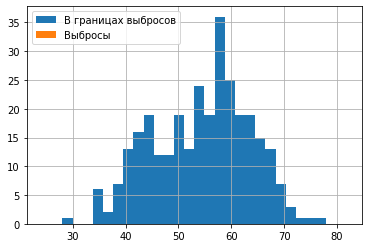

In [37]:
analyse_numeric(dfh, 'age')

Количество: 303, Среднее: 0.683, Стандартное отклонение: 0.466.
Минимум: 0, 25-й перцентиль: 0.0, Медиана: 1.0, 75-й перцентиль: 1.0, Максимум: 1, IQR: 1.0.
Количество пропусков в столбце:  0
Границы выбросов: [-1.5, 2.5]. Количество выбросов:  0


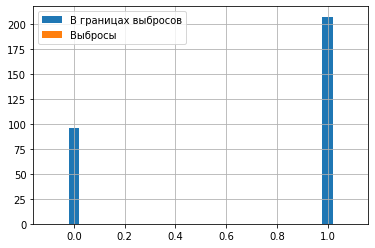

In [38]:
analyse_numeric(dfh, 'sex')

Количество: 303, Среднее: 0.967, Стандартное отклонение: 1.032.
Минимум: 0, 25-й перцентиль: 0.0, Медиана: 1.0, 75-й перцентиль: 2.0, Максимум: 3, IQR: 2.0.
Количество пропусков в столбце:  0
Границы выбросов: [-3.0, 5.0]. Количество выбросов:  0


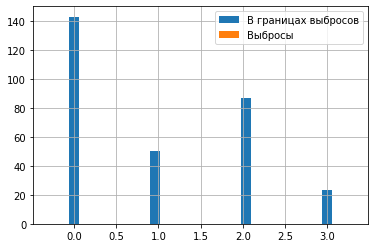

In [39]:
analyse_numeric(dfh, 'cp')

Количество: 303, Среднее: 131.624, Стандартное отклонение: 17.538.
Минимум: 94, 25-й перцентиль: 120.0, Медиана: 130.0, 75-й перцентиль: 140.0, Максимум: 200, IQR: 20.0.
Количество пропусков в столбце:  0
Границы выбросов: [90.0, 170.0]. Количество выбросов:  9


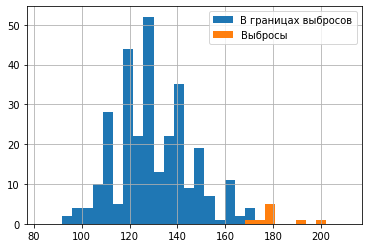

In [40]:
analyse_numeric(dfh, 'trestbps')

Количество: 303, Среднее: 246.264, Стандартное отклонение: 51.831.
Минимум: 126, 25-й перцентиль: 211.0, Медиана: 240.0, 75-й перцентиль: 274.5, Максимум: 564, IQR: 63.5.
Количество пропусков в столбце:  0
Границы выбросов: [115.75, 369.75]. Количество выбросов:  5


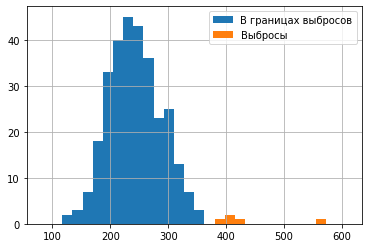

In [41]:
analyse_numeric(dfh, 'chol')

Количество: 303, Среднее: 0.528, Стандартное отклонение: 0.526.
Минимум: 0, 25-й перцентиль: 0.0, Медиана: 1.0, 75-й перцентиль: 1.0, Максимум: 2, IQR: 1.0.
Количество пропусков в столбце:  0
Границы выбросов: [-1.5, 2.5]. Количество выбросов:  0


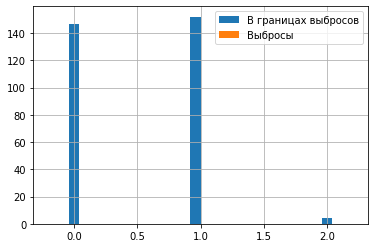

In [42]:
analyse_numeric(dfh, 'restecg')

Количество: 303, Среднее: 149.647, Стандартное отклонение: 22.905.
Минимум: 71, 25-й перцентиль: 133.5, Медиана: 153.0, 75-й перцентиль: 166.0, Максимум: 202, IQR: 32.5.
Количество пропусков в столбце:  0
Границы выбросов: [84.75, 214.75]. Количество выбросов:  1


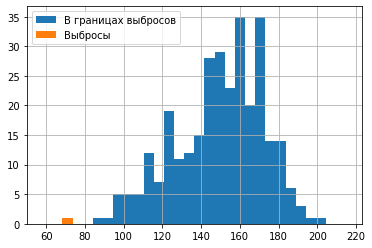

In [43]:
analyse_numeric(dfh, 'thalach')

Количество: 303, Среднее: 0.327, Стандартное отклонение: 0.470.
Минимум: 0, 25-й перцентиль: 0.0, Медиана: 0.0, 75-й перцентиль: 1.0, Максимум: 1, IQR: 1.0.
Количество пропусков в столбце:  0
Границы выбросов: [-1.5, 2.5]. Количество выбросов:  0


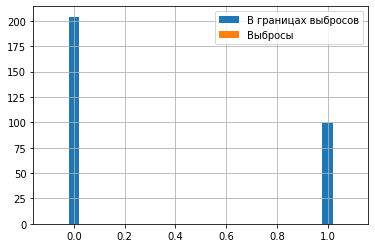

In [44]:
analyse_numeric(dfh, 'exang')

Количество: 303, Среднее: 1.040, Стандартное отклонение: 1.161.
Минимум: 0.0, 25-й перцентиль: 0.0, Медиана: 0.8, 75-й перцентиль: 1.6, Максимум: 6.2, IQR: 1.6.
Количество пропусков в столбце:  0
Границы выбросов: [-2.4000000000000004, 4.0]. Количество выбросов:  5


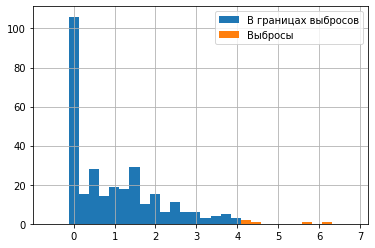

In [45]:
analyse_numeric(dfh, 'oldpeak')

In [46]:
uno = dfh.quantile([0.75]).values
dos = dfh.quantile([0.25]).values
iqr = uno-dos
mask75 = uno + iqr * 1.5
mask25 = dos - iqr * 1.5
gg = dfh.values
print(gg[~((gg < mask25)|(gg > mask75)).any(axis=1)].shape[0])

284


In [47]:
gg[~((gg < mask25)|(gg > mask75)).any(axis=1)].shape

(284, 10)

In [48]:
X = gg[~((gg < mask25)|(gg > mask75)).any(axis=1)][:, :9]
y = gg[~((gg < mask25)|(gg > mask75)).any(axis=1)][:, 9]

# X = dfh.drop(['target'], axis=1)
# y = dfh['target']

In [49]:
X

array([[ 63. ,   1. ,   3. , ..., 150. ,   0. ,   2.3],
       [ 37. ,   1. ,   2. , ..., 187. ,   0. ,   3.5],
       [ 41. ,   0. ,   1. , ..., 172. ,   0. ,   1.4],
       ...,
       [ 68. ,   1. ,   0. , ..., 141. ,   0. ,   3.4],
       [ 57. ,   1. ,   0. , ..., 115. ,   1. ,   1.2],
       [ 57. ,   0. ,   1. , ..., 174. ,   0. ,   0. ]])

In [50]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [51]:
X.shape, y.shape

((284, 9), (284,))

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, random_state=5)

In [53]:
# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

In [54]:
lr = LogisticRegression(random_state=5, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred = lr.predict(X_val)
y_pred_proba = lr.predict_proba(X_val)

In [56]:
y_val.shape, (y_pred_proba[:, 0]).shape

((43,), (43,))

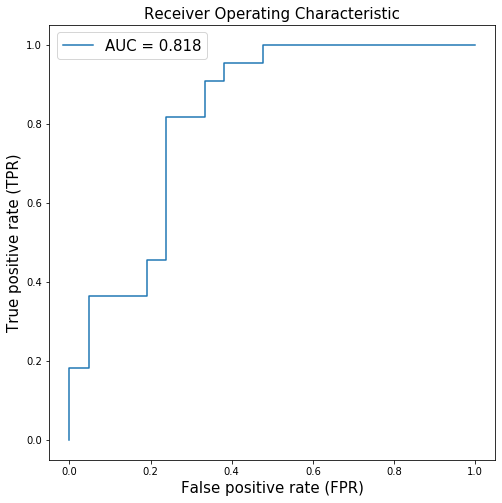

In [57]:
calc_and_plot_roc(y_val, y_pred_proba[:, 1])

In [58]:
kn=KNeighborsClassifier(n_neighbors=3)

In [59]:
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [60]:
y_pred = kn.predict(X_val)
y_pred_proba = kn.predict_proba(X_val)

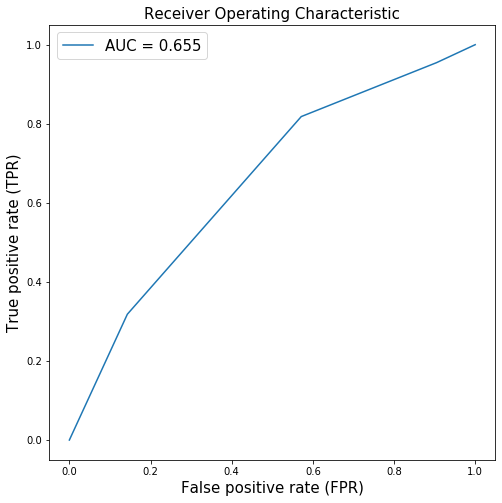

In [61]:
calc_and_plot_roc(y_val, y_pred_proba[:, 1])